# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import skewnorm
import seaborn as sns
import functools 
import operator 

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
customers = pd.read_csv('../data/Wholesale customers data.csv')
customers.head(7)

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
5        2       3   9413  8259     5126     666              1795        1451
6        2       3  12126  3199     6975     480              3140         545

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

Column names as explained in https://archive.ics.uci.edu/ml/datasets/wholesale+customers:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

REGION Frequency
Lisbon 77
Oporto 47
Other Region 316
Total 440

CHANNEL Frequency
Horeca 298
Retail 142
Total 440

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


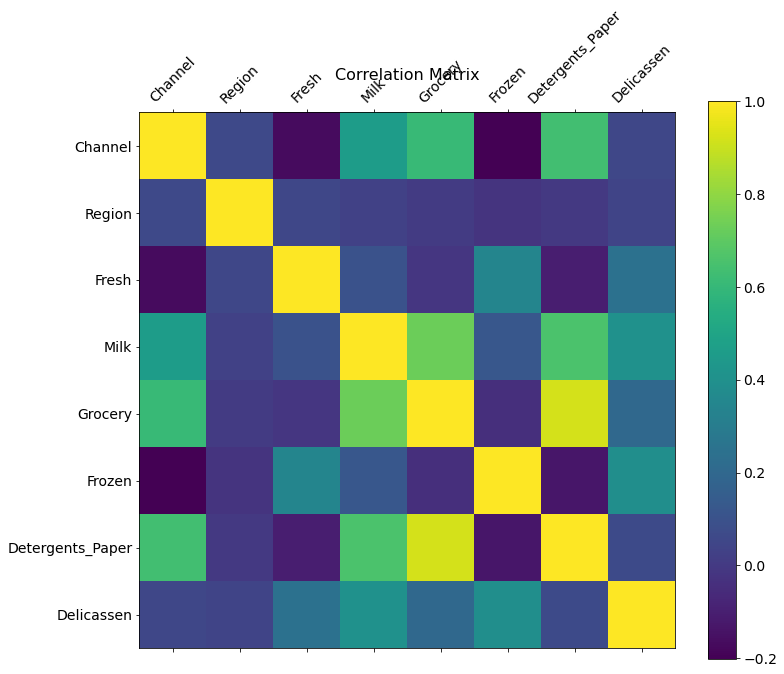

In [5]:
f = plt.figure(figsize=(12, 10))
plt.matshow(customers.corr(), fignum=f.number)
plt.xticks(range(customers.shape[1]), customers.columns, fontsize=14, rotation=45)
plt.yticks(range(customers.shape[1]), customers.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [6]:
cols = customers.columns
fig = px.box(customers)
fig.show()

Fresh Skewness is 2.561322751927935: the distribution is highly skewed
Milk Skewness is 4.053754849210881: the distribution is highly skewed
Grocery Skewness is 3.5874286903915453: the distribution is highly skewed
Frozen Skewness is 5.9079856924559575: the distribution is highly skewed
Detergents_Paper Skewness is 3.6318506306913645: the distribution is highly skewed
Delicassen Skewness is 11.151586478906117: the distribution is highly skewed


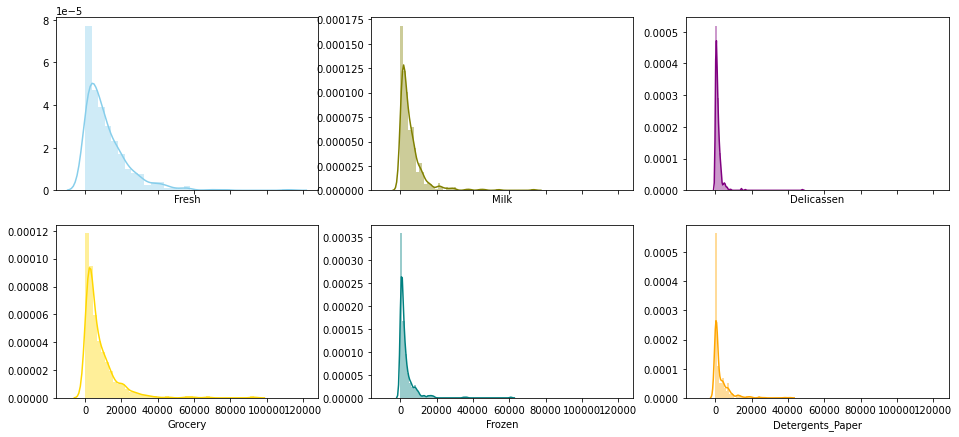

In [7]:
f, axes = plt.subplots(2, 3, figsize=(16, 7), sharex=True)
sns.distplot(customers['Fresh'], color="skyblue", ax=axes[0, 0])
sns.distplot(customers['Milk'], color="olive", ax=axes[0, 1])
sns.distplot(customers['Grocery'], color="gold", ax=axes[1, 0])
sns.distplot(customers['Frozen'], color="teal", ax=axes[1, 1])
sns.distplot(customers['Detergents_Paper'], color="orange", ax=axes[1, 2])
sns.distplot(customers['Delicassen'], color="purple", ax=axes[0, 2])

print(f"Fresh Skewness is {customers['Fresh'].skew()}: the distribution is highly skewed") 
print(f"Milk Skewness is {customers['Milk'].skew()}: the distribution is highly skewed")
print(f"Grocery Skewness is {customers['Grocery'].skew()}: the distribution is highly skewed")
print(f"Frozen Skewness is {customers['Frozen'].skew()}: the distribution is highly skewed")
print(f"Detergents_Paper Skewness is {customers['Detergents_Paper'].skew()}: the distribution is highly skewed")
print(f"Delicassen Skewness is {customers['Delicassen'].skew()}: the distribution is highly skewed")

plt.show()

No missing data and categorical data was already converted. Distribution of values is not normal, as the strong skewness tells us that no value follows a normal distribution. There are a lot of outliers and will work on them later.

In [8]:
# Pareto: 20% of the customers account for 80% of the typical retail sales

products = customers.columns.drop(['Channel', 'Region'])
                       
customers['Total_Spending'] = customers[products].sum(axis=1)


def richest(x):
    top_20 = customers.sort_values(['Total_Spending'], ascending=False).head(20)
    percentage = (top_20['Total_Spending'].sum() / customers['Total_Spending'].sum() * 100).round(2)

    print(f"Top_20 spent {top_20['Total_Spending'].sum()} euros.")
    print(f"Total spendinding was {customers['Total_Spending'].sum()} euros.")
    
    if percentage >= 80:
        print(f"Top 20 customers spending is {percentage}%. The dataset displays the Pareto principle.")
    else:
        print(f"Top 20 customers spending is {percentage}%. The dataset doesn't displays the Pareto principle.")

richest(customers)

Top_20 spent 2450085 euros.
Total spendinding was 14619500 euros.
Top 20 customers spending is 16.76%. The dataset doesn't displays the Pareto principle.


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [53]:
from scipy import stats
customers = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 439
Data columns (total 12 columns):
Channel             408 non-null int64
Region              408 non-null int64
Fresh               408 non-null int64
Milk                408 non-null int64
Grocery             408 non-null int64
Frozen              408 non-null int64
Detergents_Paper    408 non-null int64
Delicassen          408 non-null int64
Total_Spending      408 non-null int64
labels              408 non-null int32
labels_             408 non-null int64
labels_DBSCAN       408 non-null int64
dtypes: int32(1), int64(11)
memory usage: 39.8 KB


I started Challenge 3 without any transformation, but there where a few outliers clearly disturbing results, so I decided to remove those.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [54]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)
customers_scale 

array([[ 1.46234795,  0.57134957,  0.19258427, ..., -0.19725833,
        -0.70495442, -0.70495442],
       [ 1.46234795,  0.57134957, -0.37623271, ..., -0.19725833,
        -0.70495442, -0.70495442],
       [ 1.46234795,  0.57134957, -0.44758823, ..., -0.19725833,
        -0.70495442, -0.70495442],
       ...,
       [ 1.46234795,  0.57134957,  0.3813115 , ..., -0.56643907,
        -0.70495442, -0.70495442],
       [-0.68383178,  0.57134957, -0.04854467, ..., -0.9356198 ,
         1.0382056 ,  1.0382056 ],
       [-0.68383178,  0.57134957, -0.80902824, ..., -0.9356198 ,
         1.0382056 ,  1.0382056 ]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42).fit(customers_scale)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [70]:
customers['labels'] = kmeans.labels_
customers.head(5)

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total_Spending  labels  labels_  labels_DBSCAN  
0        1338           34112       0       -1             -1  
1        1776           33266       0       -1             -1  
2        7844           36610       0       -1             -1  
3        1788           27381       1       -1             -1  
4        5185           46100       0       -1             -1

Count the values in `labels`.

In [71]:
Unique,count = np.unique(kmeans.labels_,return_index=True)

print(count) 


[  0   3   8   9  28  22 182  31]


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [72]:
from sklearn.cluster import DBSCAN

dbscan_c = DBSCAN(eps=0.5,
                  min_samples=5).fit(customers_scale)

customers['labels_DBSCAN'] = dbscan_c.labels_
customers.head(50)

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0         2       3  12669   9656     7561     214              2674   
1         2       3   7057   9810     9568    1762              3293   
2         2       3   6353   8808     7684    2405              3516   
3         1       3  13265   1196     4221    6404               507   
4         2       3  22615   5410     7198    3915              1777   
5         2       3   9413   8259     5126     666              1795   
6         2       3  12126   3199     6975     480              3140   
7         2       3   7579   4956     9426    1669              3321   
8         1       3   5963   3648     6192     425              1716   
9         2       3   6006  11093    18881    1159              7425   
10        2       3   3366   5403    12974    4400              5977   
11        2       3  13146   1124     4523    1420               549   
12        2       3  31714  12319    11757     287              3881   
13        2       3  21217   6208    14982    3095              6707   
14        2       3  24653   9465    12091     294              5058   
15        1       3  10253   1114     3821     397               964   
16        2       3   1020   8816    12121     134              4508   
17        1       3   5876   6157     2933     839               370   
18        2       3  18601   6327    10099    2205              2767   
19        1       3   7780   2495     9464     669              2518   
20        2       3  17546   4519     4602    1066              2259   
21        1       3   5567    871     2010    3383               375   
22        1       3  31276   1917     4469    9408              2381   
24        2       3  22647   9776    13792    2915              4482   
25        2       3  16165   4230     7595     201              4003   
26        1       3   9898    961     2861    3151               242   
27        1       3  14276    803     3045     485               100   
28        2       3   4113  20484    25957    1158              8604   
29        1       3  43088   2100     2609    1200              1107   
30        1       3  18815   3610    11107    1148              2134   
31        1       3   2612   4339     3133    2088               820   
32        1       3  21632   1318     2886     266               918   
33        1       3  29729   4786     7326    6130               361   
34        1       3   1502   1979     2262     425               483   
35        2       3    688   5491    11091     833              4239   
36        1       3  29955   4362     5428    1729               862   
37        2       3  15168  10556    12477    1920              6506   
38        2       3   4591  15729    16709      33              6956   
40        1       3  24025   4332     4757    9510              1145   
41        1       3  19176   3065     5956    2033              2575   
42        2       3  10850   7555    14961     188              6899   
43        2       3    630  11095    23998     787              9529   
44        2       3   9670   7027    10471     541              4618   
45        2       3   5181  22044    21531    1740              7353   
46        2       3   3103  14069    21955    1668              6792   
48        2       3  11519   6152    10868     584              5121   
49        2       3   4967  21412    28921    1798             13583   
50        1       3   6269   1095     1980    3860               609   
51        1       3   3347   4051     6996     239              1538   
52        2       3  40721   3916     5876     532              2587   

    Delicassen  Total_Spending  labels  labels_  labels_DBSCAN  
0         1338           34112       0       -1             -1  
1         1776           33266       0       -1             -1  
2         7844           36610       0       -1             -1  
3         1788           27381       1       -1             -1  
4     

Count the values in `labels_DBSCAN`.

In [73]:
Unique,count = np.unique(dbscan_c.labels_,return_index=True)

print(count) 

[ 0 15 72]


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

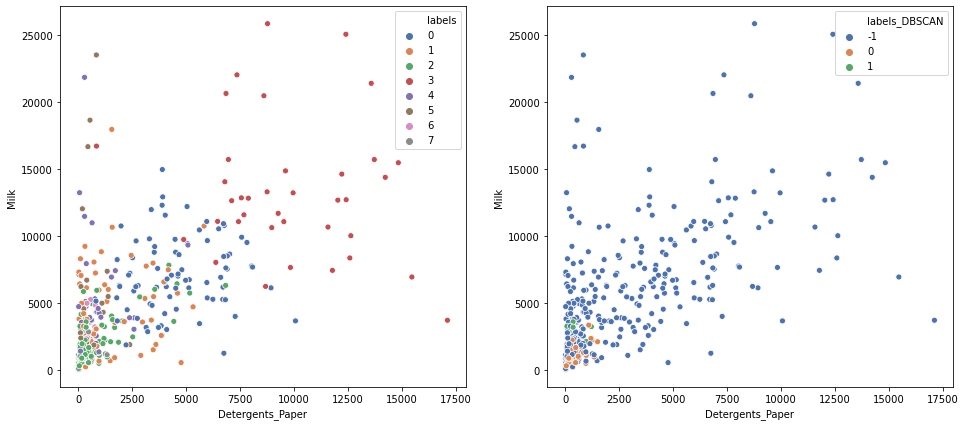

In [74]:
f, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.scatterplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels', palette=sns.color_palette('deep', n_colors=8), ax=axes[0])
sns.scatterplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', palette=sns.color_palette('deep', n_colors=3), ax=axes[1])

plt.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

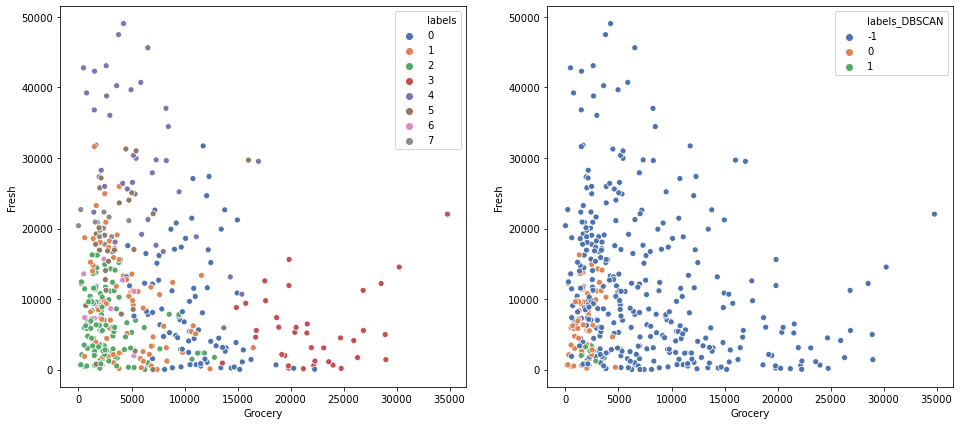

In [75]:
f, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.scatterplot(data=customers, x='Grocery', y='Fresh', hue='labels', palette=sns.color_palette('deep', n_colors=8), ax=axes[0])
sns.scatterplot(data=customers, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette=sns.color_palette('deep', n_colors=3), ax=axes[1])

plt.show();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

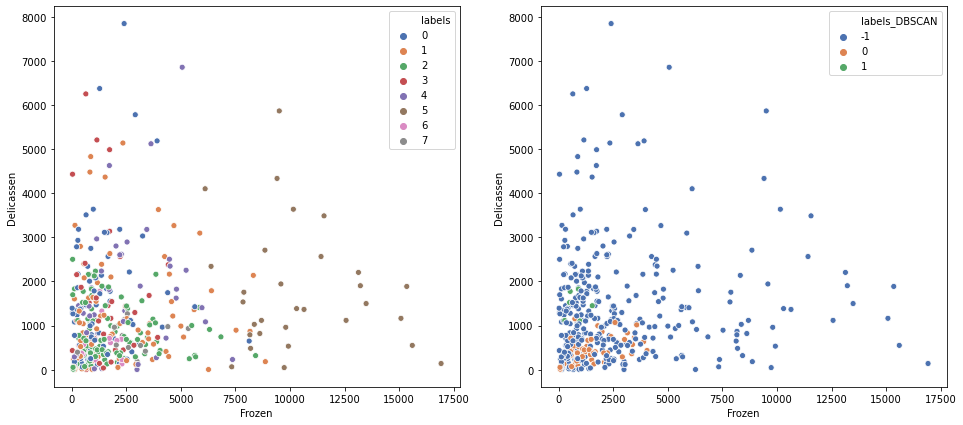

In [76]:
f, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels', palette=sns.color_palette('deep', n_colors=8), ax=axes[0])
sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette=sns.color_palette('deep', n_colors=3), ax=axes[1])

plt.show();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [67]:
customers.groupby(['labels']).mean()


Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.000000  2.931034   4464.206897   5289.172414   6232.551724   
1       2.000000  2.472222   5896.444444  13543.555556  22126.611111   
2       1.000000  3.000000  20028.500000   1563.071429   2214.285714   
3       1.061947  3.000000   6329.707965   2153.115044   2920.424779   
4       1.000000  1.000000   8190.000000   2041.875000   2279.250000   
5       1.057143  2.828571  31767.114286   3735.685714   4644.885714   
6       2.000000  2.761194   7456.477612   6776.522388  10824.417910   
7       1.035714  2.750000  17457.357143   3890.071429   3932.214286   
8       1.080000  1.340000  10843.340000   3138.260000   4574.820000   
9       1.650000  2.500000  14144.700000  10794.850000  10267.500000   

              Frozen  Detergents_Paper   Delicassen  Total_Spending   labels_  \
labels                                                                          
0        1989.965517       1725.137931  1487.586207    21188.620690 -1.000000   
1        1532.527778       9835.638889  1612.944444    54547.722222 -1.000000   
2        2417.000000        427.857143   661.071429    27311.785714  1.000000   
3        1753.212389        760.442478   794.707965    14711.610619  1.061947   
4        1278.437500        315.250000   619.500000    14724.312500  3.000000   
5        2568.371429        754.800000  1523.971429    44994.828571 -1.000000   
6        1232.955224       4692.567164  1010.582090    31993.522388 -0.925373   
7       10628.785714        527.750000  1627.642857    38063.821429 -1.000000   
8        2449.520000       1226.440000  1007.760000    23240.140000 -1.000000   
9        2855.350000       3113.550000  4082.000000    45257.950000 -1.000000   

        labels_DBSCAN  
labels                 
0           -1.000000  
1           -1.000000  
2           -1.000000  
3           -0.336283  
4           -1.000000  
5           -1.000000  
6           -1.000000  
7           -1.000000  
8           -1.000000  
9           -1.000000

In [68]:
customers.groupby(['labels_DBSCAN']).mean()


Channel    Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                               
-1             1.381232  2.486804  11642.035191  5596.219941  7860.061584   
 0             1.000000  3.000000   6876.830508  1228.508475  1816.644068   
 1             1.000000  3.000000   2257.875000  3065.500000  2414.375000   

                    Frozen  Detergents_Paper   Delicassen  Total_Spending  \
labels_DBSCAN                                                               
-1             2705.436950       2799.129032  1382.548387    31985.431085   
 0             1438.457627        378.000000   440.101695    12178.542373   
 1              944.125000        432.625000  1426.250000    10540.750000   

                 labels  labels_  
labels_DBSCAN                     
-1             4.747801 -0.42522  
 0             3.000000  1.00000  
 1             3.000000  1.00000

Which algorithm appears to perform better?

This is... weird. First, I plotted the original dataframe (440 values) and, while there were a lot of dots packed around the axes, you could see layers well distributed (better with K-Means). What we are displaying now is the dataset after revoming outliers (32 values removed) and now no algorith performs a little bit worse.

Another conclusion is that the algorithm do not cluster better according to correlation. Grocery and fresh are not correlated, but better plotted. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [87]:
kmeans10 = KMeans(n_clusters=10, random_state=42).fit(customers_scale)

Unique,count = np.unique(kmeans10.labels_,return_index=True)

print(count) 

[  3   9  31   8 182  28   0  22 181   2]


In [88]:
customers['labels10'] = kmeans10.labels_

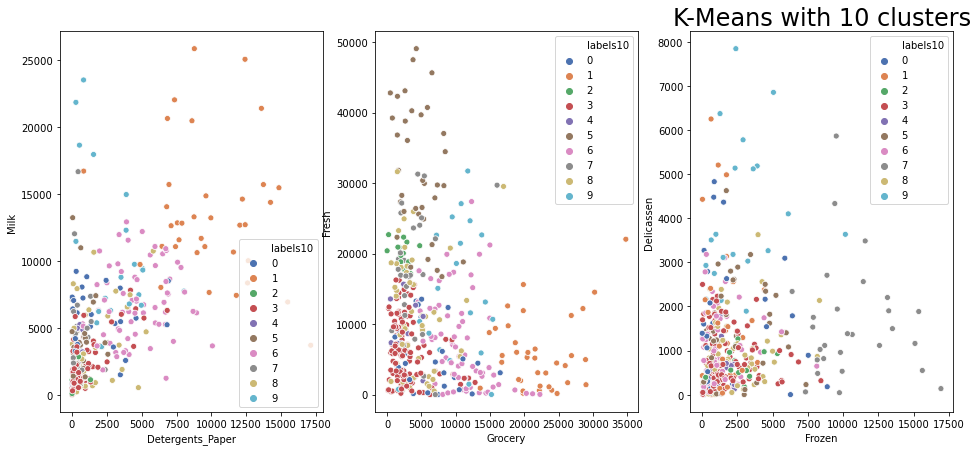

In [89]:
f, axes = plt.subplots(1, 3, figsize=(16, 7))
sns.scatterplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels10', palette=sns.color_palette('deep', n_colors=10), ax=axes[0])
sns.scatterplot(data=customers, x='Grocery', y='Fresh', hue='labels10', palette=sns.color_palette('deep', n_colors=10), ax=axes[1])
sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels10', palette=sns.color_palette('deep', n_colors=10), ax=axes[2])

plt.title('K-Means with 10 clusters', fontsize=24)
plt.show();

In [90]:
kmeans5 = KMeans(n_clusters=5, random_state=42).fit(customers_scale)

Unique,count = np.unique(kmeans5.labels_,return_index=True)

print(count) 

[ 9  8 22  0  3]


In [91]:
customers['labels5'] = kmeans5.labels_

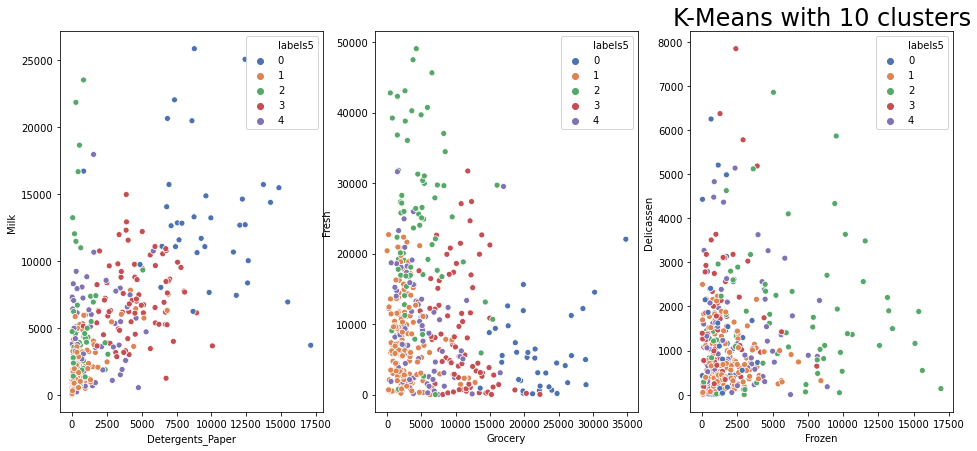

In [92]:
f, axes = plt.subplots(1, 3, figsize=(16, 7))
sns.scatterplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels5', palette=sns.color_palette('deep', n_colors=5), ax=axes[0])
sns.scatterplot(data=customers, x='Grocery', y='Fresh', hue='labels5', palette=sns.color_palette('deep', n_colors=5), ax=axes[1])
sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels5', palette=sns.color_palette('deep', n_colors=5), ax=axes[2])

plt.title('K-Means with 10 clusters', fontsize=24)
plt.show();

I actually don't like a lot any of them. Every model is good on Fresh vs Groceries and bad in Delicassen vs Frozen

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here